In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_PRML/Minor_dataset.xlsx - Sheet1.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Date              10683 non-null  int64 
 3   Month/Year        10683 non-null  object
 4   Month             10683 non-null  int64 
 5   Source            10683 non-null  object
 6   Destination       10683 non-null  object
 7   Route             10682 non-null  object
 8   Dep_Time          10683 non-null  object
 9   Edited_dep_time   10683 non-null  int64 
 10  Arrival_Time      10683 non-null  object
 11  Edited_arri_time  10683 non-null  int64 
 12  Duration          10683 non-null  object
 13  Total_Stops       10682 non-null  object
 14  Additional_Info   10683 non-null  object
 15  Price             10683 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 1.3+ MB


In [ ]:
def covertor(string,num1="",num2=""):
  for i in range(len(string)):
    if(string[i] =="h"):
      for j in range(0,i):
        num1 = num1+string[j]
      # print(int(num1)*60)
    if(string[i] == " "):
      i=i+1
      while string[i]!='m':
        num2 = num2+string[i]
        i=i+1
      break
      # print(int(num2))
    if(string[i] =="m"):
      for j in range(0,i):
        num2 = num2+string[j]
      # print(int(num1)*60)
  if(num2==""):
    return int(num1)*60
  elif(num1==""):
    return int(num2)
  else:
    return int(num1)*60   + int(num2)


In [ ]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Date', 'Month/Year', 'Month', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Edited_dep_time', 'Arrival_Time',
       'Edited_arri_time', 'Duration', 'Total_Stops', 'Additional_Info',
       'Price'],
      dtype='object')

In [ ]:
dataset = dataset[['Airline','Date','Month','Source','Destination','Edited_dep_time','Edited_arri_time','Duration','Total_Stops','Price']]

In [ ]:
dataset

,Airline,Date,Month,Source,Destination,Edited_dep_time,Edited_arri_time,Duration,Total_Stops,Price
0,IndiGo,24,3,Banglore,New Delhi,22,1,2h 50m,non-stop,3897
1,Air India,1,5,Kolkata,Banglore,5,13,7h 25m,2 stops,7662
2,Jet Airways,9,6,Delhi,Cochin,9,4,19h,2 stops,13882
3,IndiGo,12,5,Kolkata,Banglore,18,23,5h 25m,1 stop,6218
4,IndiGo,1,3,Banglore,New Delhi,16,21,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,19,22,2h 30m,non-stop,4107
10679,Air India,27,4,Kolkata,Banglore,20,23,2h 35m,non-stop,4145
10680,Jet Airways,27,4,Banglore,Delhi,8,11,3h,non-stop,7229
10681,Vistara,1,3,Banglore,New Delhi,11,14,2h 40m,non-stop,12648


In [ ]:
dataset.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
dataset = dataset.dropna()

In [ ]:
L=list(dataset.Duration)

In [ ]:

Rep = [covertor(val) for val in L]

In [ ]:
dataset['Duration'] = Rep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

,Airline,Date,Month,Source,Destination,Edited_dep_time,Edited_arri_time,Duration,Total_Stops,Price
0,IndiGo,24,3,Banglore,New Delhi,22,1,170,non-stop,3897
1,Air India,1,5,Kolkata,Banglore,5,13,445,2 stops,7662
2,Jet Airways,9,6,Delhi,Cochin,9,4,1140,2 stops,13882
3,IndiGo,12,5,Kolkata,Banglore,18,23,325,1 stop,6218
4,IndiGo,1,3,Banglore,New Delhi,16,21,285,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,19,22,150,non-stop,4107
10679,Air India,27,4,Kolkata,Banglore,20,23,155,non-stop,4145
10680,Jet Airways,27,4,Banglore,Delhi,8,11,180,non-stop,7229
10681,Vistara,1,3,Banglore,New Delhi,11,14,160,non-stop,12648


In [ ]:
dataset.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
dataset.loc[dataset['Total_Stops']=='non-stop','Total_Stops'] = 0
dataset.loc[dataset['Total_Stops']=='1 stop','Total_Stops'] = 1
dataset.loc[dataset['Total_Stops']=='2 stops','Total_Stops'] = 2
dataset.loc[dataset['Total_Stops']=='3 stops','Total_Stops'] = 3
dataset.loc[dataset['Total_Stops']=='4 stops','Total_Stops'] = 4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
dataset

,Airline,Date,Month,Source,Destination,Edited_dep_time,Edited_arri_time,Duration,Total_Stops,Price
0,IndiGo,24,3,Banglore,New Delhi,22,1,170,0,3897
1,Air India,1,5,Kolkata,Banglore,5,13,445,2,7662
2,Jet Airways,9,6,Delhi,Cochin,9,4,1140,2,13882
3,IndiGo,12,5,Kolkata,Banglore,18,23,325,1,6218
4,IndiGo,1,3,Banglore,New Delhi,16,21,285,1,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9,4,Kolkata,Banglore,19,22,150,0,4107
10679,Air India,27,4,Kolkata,Banglore,20,23,155,0,4145
10680,Jet Airways,27,4,Banglore,Delhi,8,11,180,0,7229
10681,Vistara,1,3,Banglore,New Delhi,11,14,160,0,12648


In [ ]:
i=0
for airline in dataset.Airline.unique():
  i+=1
  dataset.loc[dataset['Airline']==airline,'Airline'] =i 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
i=0
for airports in dataset.Source.unique():
  i+=1
  dataset.loc[dataset['Source']==airports,'Source'] =i 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
i=0
for airports in dataset.Destination.unique():
  i+=1
  dataset.loc[dataset['Destination']==airports,'Destination'] =i 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date              10682 non-null  int64 
 2   Month             10682 non-null  int64 
 3   Source            10682 non-null  object
 4   Destination       10682 non-null  object
 5   Edited_dep_time   10682 non-null  int64 
 6   Edited_arri_time  10682 non-null  int64 
 7   Duration          10682 non-null  int64 
 8   Total_Stops       10682 non-null  object
 9   Price             10682 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 918.0+ KB


In [ ]:
dataset['Total_Stops']=dataset.Total_Stops.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset['Airline'] = dataset.Airline.astype(int)
dataset['Source'] = dataset.Source.astype(int)
dataset['Destination'] = dataset.Destination.astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

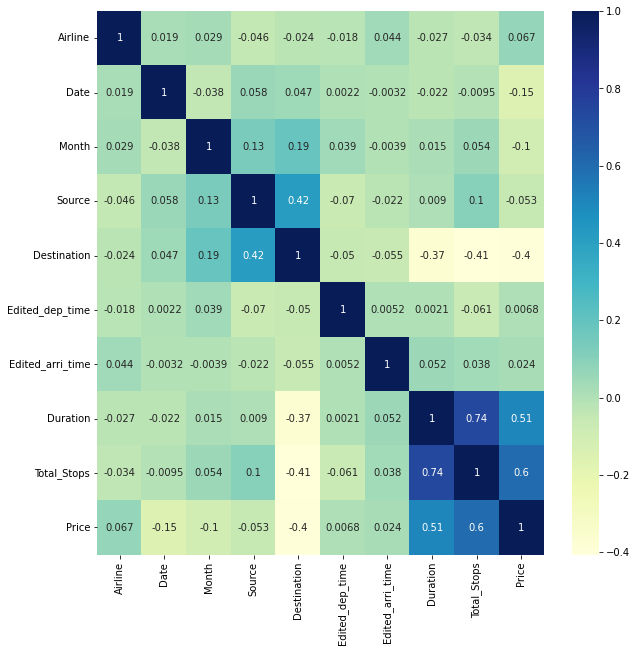

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [ ]:
col = list(dataset.columns)
col.remove('Price')
X= dataset[col]
y=dataset['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
prid = regressor.predict(X_test)
mean_squared_error(y_test,prid)
r2_score(y_test,prid)

0.7094456209374829

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1311.0654 degrees.
Accuracy = 85.39%.


In [ ]:

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 1249.5164 degrees.
Accuracy = 85.89%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.58%.


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 1305.9934 degrees.
Accuracy = 85.31%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.10%.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(random_state=0)

In [ ]:
 reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
prid = reg.predict(X_test)

In [ ]:
mean_squared_error(prid,y_test)

5454514.657307442

In [ ]:
y_test

696       6838
10280     6785
6012      8586
3957     17024
2076     14571
         ...  
3558      9187
9166      8479
90        9646
3936      7240
8855     13276
Name: Price, Length: 2137, dtype: int64

In [ ]:
prid

array([ 9693.50850575,  6795.86668384, 11731.73696872, ...,
        9384.54645399,  7817.95646934, 11933.69341954])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

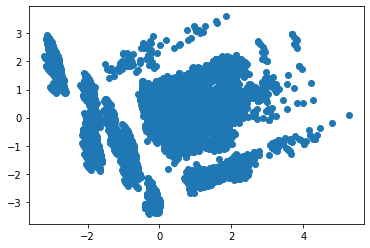

In [ ]:
plt.scatter(X_new[:,0],X_new[:,1])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
mean_squared_error(y_pred,y_test)

4322544.017393549

In [ ]:
reg_rf.score(X_train, y_train)

0.9532359538521376

In [ ]:
reg_rf.score(X_test, y_test)

0.7907255071256296

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
prediction = rf_random.predict(X_test)

In [ ]:
rf_random.score(X_test, y_test)

-3969222.689322923

In [ ]:
r2_score(y_test, prediction)

0.8078314385993512

In [ ]:
dataset

,Airline,Date,Month,Source,Destination,Edited_dep_time,Edited_arri_time,Duration,Total_Stops,Price
0,1,24,3,1,1,22,1,170,0,3897
1,2,1,5,2,2,5,13,445,2,7662
2,3,9,6,3,3,9,4,1140,2,13882
3,1,12,5,2,2,18,23,325,1,6218
4,1,1,3,1,1,16,21,285,1,13302
...,...,...,...,...,...,...,...,...,...,...
10678,8,9,4,2,2,19,22,150,0,4107
10679,2,27,4,2,2,20,23,155,0,4145
10680,3,27,4,1,5,8,11,180,0,7229
10681,7,1,3,1,1,11,14,160,0,12648


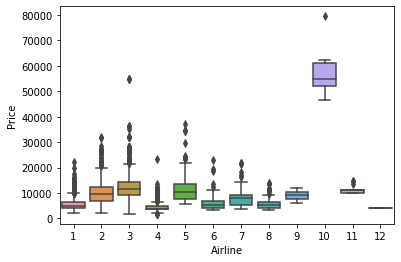

In [ ]:

sns.boxplot(x="Airline", y="Price", data=dataset)

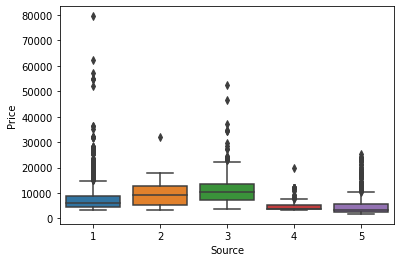

In [ ]:
sns.boxplot(x="Source", y="Price", data=dataset)

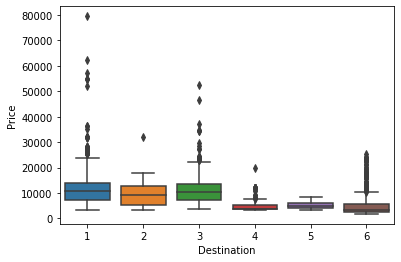

In [ ]:
sns.boxplot(x="Destination", y="Price", data=dataset)

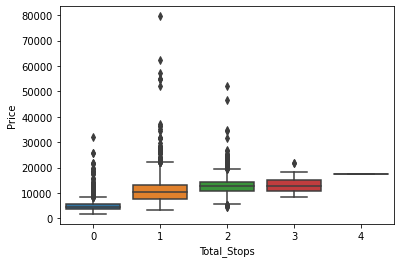

In [ ]:
sns.boxplot(x="Total_Stops", y="Price", data=dataset)

In [ ]:

import lightgbm as lgb

In [ ]:
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(5)])

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
rmse_test = mean_squared_error(y_test, y_pred) 
print(f'The RMSE of prediction is: {rmse_test}')

# feature importances
print(f'Feature importances: {list(gbm.feature_importances_)}')


[1]	valid_0's l1: 3489.33	valid_0's l2: 1.92831e+07
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 3359.84	valid_0's l2: 1.80618e+07
[3]	valid_0's l1: 3238.1	valid_0's l2: 1.69681e+07
[4]	valid_0's l1: 3124.1	valid_0's l2: 1.59823e+07
[5]	valid_0's l1: 3017.17	valid_0's l2: 1.50725e+07
[6]	valid_0's l1: 2915.28	valid_0's l2: 1.41914e+07
[7]	valid_0's l1: 2819.34	valid_0's l2: 1.33995e+07
[8]	valid_0's l1: 2729.66	valid_0's l2: 1.26799e+07
[9]	valid_0's l1: 2642.28	valid_0's l2: 1.19929e+07
[10]	valid_0's l1: 2562.78	valid_0's l2: 1.13785e+07
[11]	valid_0's l1: 2492.78	valid_0's l2: 1.08233e+07
[12]	valid_0's l1: 2426.61	valid_0's l2: 1.03206e+07
[13]	valid_0's l1: 2365.35	valid_0's l2: 9.86755e+06
[14]	valid_0's l1: 2305.49	valid_0's l2: 9.43753e+06
[15]	valid_0's l1: 2252.27	valid_0's l2: 9.05722e+06
[16]	valid_0's l1: 2203.79	valid_0's l2: 8.71722e+06
[17]	valid_0's l1: 2156.67	valid_0's l2: 8.39587e+06
[18]	valid_0's l1: 2112.05	valid_0's l2: 8.10643e

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
pro = clf.predict(X_test)

r2_score(y_test, pro)

0.5915729916479213

In [ ]:
import pickle